Working with collections and object selections

In [59]:
%%bash

rootls -l data/collections_dataset.root

TTree  Mar 27 15:37 2018 myDataset;1 "myDataset" 


In [60]:
import ROOT

treename = "myDataset"
filename = "data/collections_dataset.root"
df = ROOT.RDataFrame(treename, filename)

print(f"Columns in the dataset: {df.GetColumnNames()}")

Columns in the dataset: { "E", "nPart", "px", "py" }


In [61]:
npy_dict = df.AsNumpy(["E"])

for row, vec in enumerate(npy_dict["E"]):
    print(f"\nRow {row} contains:\n{vec}")


Row 0 contains:
{ 130000.01, 0.93827999, 0.93957090, 0.93957090, 0.93827999, 0.93957090, 0.93827999, 0.93957090, 0.93957090, 0.93827999, 0.93957090, 0.93827999, 0.93827999, 0.94612722, 0.94297180, 106159.91, 15555.974, 6246.4774, 782.95749, 1078.1841, 156.45323, 19.615241, 11711.961, 3844.0119, 308.88227, 474.07518, 868.16056, 210.02367, 142.94919, 13.504043, 13.399446, 2.8028640, 3.4129314, 258.32027, 215.75487, 58.913799, 809.24677, 2.5890092, 0.21385537, 9.3892520 }

Row 1 contains:
{ 130000.01, 0.93957090, 0.93827999, 0.93957090, 0.93957090, 0.93827999, 0.93827999, 0.93957090, 0.93827999, 0.93827999, 0.93957090, 0.93957090, 0.93827999, 0.94332697, 0.95194039, 0.94053839, 0.94349328, 0.93838184, 0.94539411, 0.93998250, 122217.22, 7395.7245, 2.1671104, 5.9762938, 61.247334, 84.256846, 202.08447, 28.955872, 74804.566, 47412.649, 3880.0412, 987.79319, 2527.8902, 1.3687218, 0.79838852, 1.2935306, 1.5876441, 3.0951194, 9.1041150, 75.152736, 21981.881, 25430.768, 3265.6709, 614.37035, 97

Define a new column with operations on RVecs

In [62]:
df1 = df.Define("good_pt", "sqrt(px*px + py*py)[E > 100]")

df1.GetColumnNames()

vector<string>{ "E", "good_pt", "nPart", "px", "py" }

Now we can plot the newly defined column values in a histogram

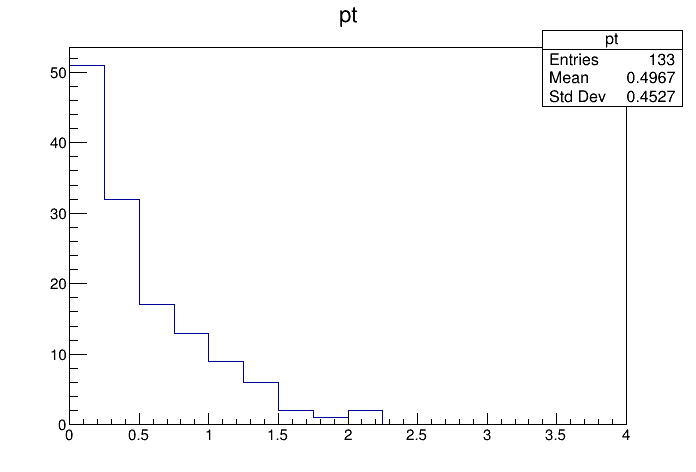

In [63]:
c = ROOT.TCanvas()
h = df1.Histo1D(("pt", "pt", 16, 0, 4), "good_pt")
h.Draw()
c.Draw()